In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("Flight Price Details.csv") #Checking the  dataset

In [3]:
Data

,Unnamed: 0,level_0,Name,Depart_Time,Arrival_Time,Duration,Price,Date
0,0,0,IndiGo,18:00,00:00,6h 00m,"11,519",31/10
1,1,1,Go First,23:55,02:25,2h 30m,"11,629",31/10
2,2,2,IndiGo,19:10,01:00,5h 50m,"11,939",31/10
3,3,3,Air India,22:00,00:20,26h 20m,"12,360",31/10
4,4,4,IndiGo,02:00,04:15,2h 15m,"12,569",31/10
...,...,...,...,...,...,...,...,...
2145,2145,2145,Vistara,20:40,11:25,14h 45m,"39,314",30/11
2146,2146,2146,Vistara,19:50,11:25,15h 35m,"39,314",30/11
2147,2147,2147,Vistara,20:40,20:40,24h 00m,"40,154",30/11
2148,2148,2148,Vistara,19:50,20:40,24h 50m,"40,154",30/11


In [4]:
Data.columns #Checking the total columns

Index(['Unnamed: 0', 'level_0', 'Name', 'Depart_Time', 'Arrival_Time',
       'Duration', 'Price', 'Date'],
      dtype='object')

In [5]:
Data.drop(['Unnamed: 0','level_0'],axis=1,inplace=True)

In [6]:
Data

,Name,Depart_Time,Arrival_Time,Duration,Price,Date
0,IndiGo,18:00,00:00,6h 00m,"11,519",31/10
1,Go First,23:55,02:25,2h 30m,"11,629",31/10
2,IndiGo,19:10,01:00,5h 50m,"11,939",31/10
3,Air India,22:00,00:20,26h 20m,"12,360",31/10
4,IndiGo,02:00,04:15,2h 15m,"12,569",31/10
...,...,...,...,...,...,...
2145,Vistara,20:40,11:25,14h 45m,"39,314",30/11
2146,Vistara,19:50,11:25,15h 35m,"39,314",30/11
2147,Vistara,20:40,20:40,24h 00m,"40,154",30/11
2148,Vistara,19:50,20:40,24h 50m,"40,154",30/11


In [7]:
Data.isnull().sum()

Name            0
Depart_Time     0
Arrival_Time    0
Duration        0
Price           0
Date            0
dtype: int64

In [8]:
# No null column

In [9]:
Data.info() #Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          2150 non-null   object
 1   Depart_Time   2150 non-null   object
 2   Arrival_Time  2150 non-null   object
 3   Duration      2150 non-null   object
 4   Price         2150 non-null   object
 5   Date          2150 non-null   object
dtypes: object(6)
memory usage: 100.9+ KB


In [10]:
# All are object datatype

In [11]:
Data.describe() # To check the dataset

,Name,Depart_Time,Arrival_Time,Duration,Price,Date
count,2150,2150,2150,2150,2150,2150
unique,6,97,104,86,105,8
top,IndiGo,20:10,09:40,2h 15m,"7,319",1/11
freq,661,93,85,565,380,525


In [12]:
Data['Name'].unique() # Checking the various airplane companies available

array(['IndiGo', 'Go First', 'Air India', 'Vistara', 'Air Asia',
       'SpiceJet'], dtype=object)

<AxesSubplot:xlabel='Name', ylabel='count'>

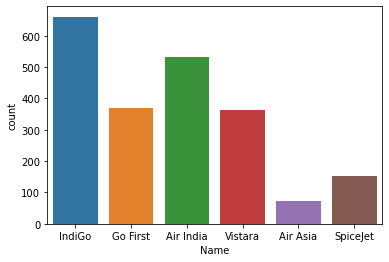

In [13]:
sns.countplot(Data['Name']) # Checking the highest available airline

In [14]:
# Indigo has the highest availability, while air asia has the lowest

In [15]:
Data['Price'] = Data['Price'].str.replace(',', '').astype(int)

In [16]:
# Converting the price into integer from string

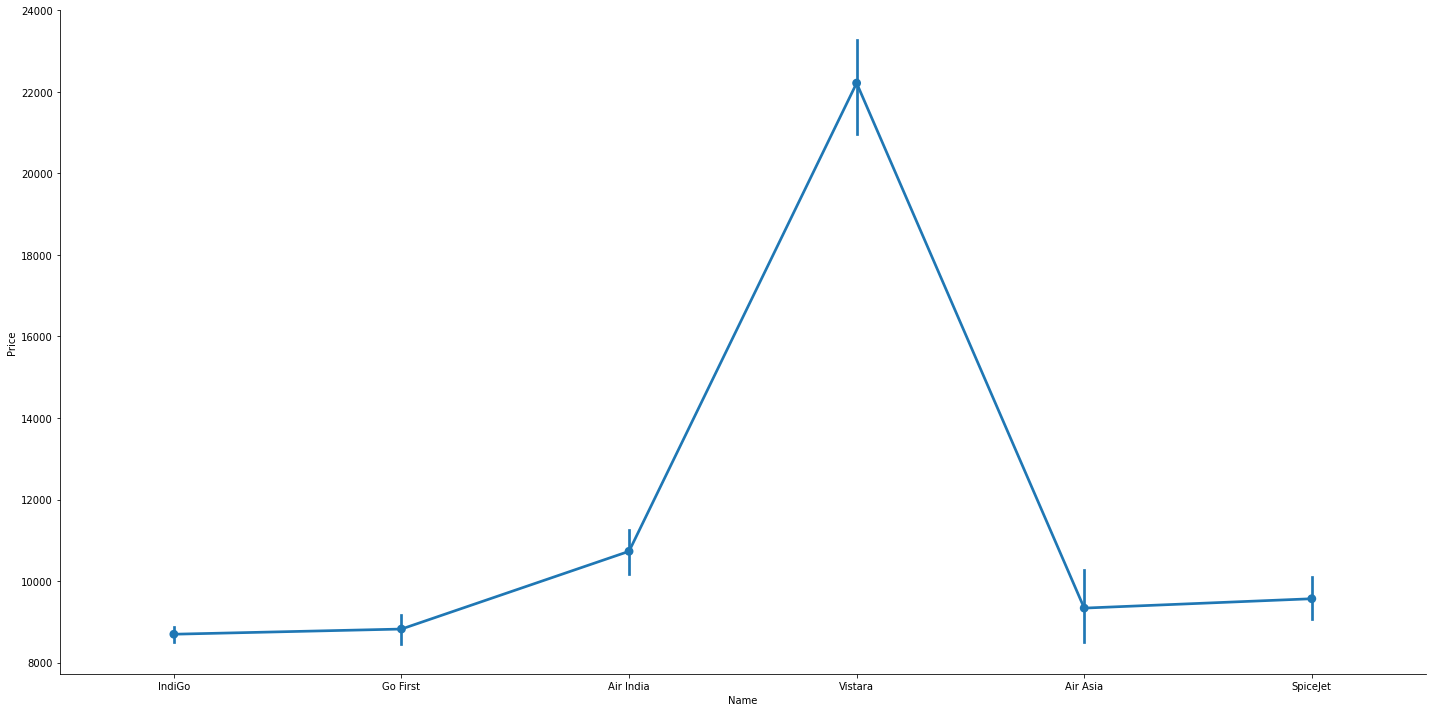

In [17]:
sns.catplot(y='Price',x='Name',data=Data,kind='point',height=10,aspect=2) # Checking the relationship between price and airlines

In [18]:
# It can be understood that Vistara is the costliest of all the airlines- rising upto Rs.24,000
# The cheapest is IndiGo which is within Rs.10,000

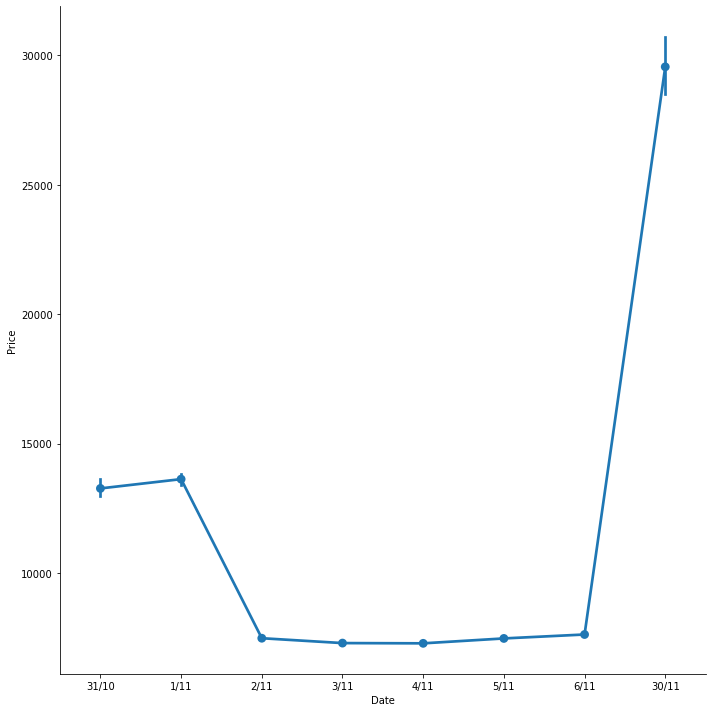

In [19]:
sns.catplot(y='Price',x='Date',data=Data,kind='point',height=10,aspect=1) # Checking the relationship between price and dates

### The above data was collected on 30th October, 2022- Based on the flight prices of different dates the following things can be concluded:

#### 1) Flight price is the most expensive if you are tying to book a ticket on the same date and can go as high as above 30,000
#### 2) Flight price will still remain high if a flight is to be booked within 2 days from the date of purchasing the ticket.
#### 3) Flight price remains low and constant if a flight is trying to be booked within 3-6 days from the date of purchasing the ticket. 

In [20]:
Data['Duration'].unique()

array(['6h 00m', '2h 30m', '5h 50m', '26h 20m', '2h 15m', '2h 00m',
       '2h 10m', '20h 05m', '7h 50m', '9h 55m', '5h 55m', '2h 20m',
       '6h 10m', '18h 50m', '10h 45m', '27h 35m', '7h 40m', '10h 25m',
       '5h 20m', '4h 50m', '6h 05m', '24h 50m', '6h 20m', '12h 25m',
       '17h 25m', '26h 35m', '5h 15m', '5h 45m', '4h 10m', '10h 10m',
       '14h 20m', '4h 55m', '8h 45m', '6h 15m', '7h 45m', '16h 55m',
       '26h 45m', '26h 55m', '5h 35m', '8h 25m', '12h 05m', '13h 25m',
       '15h 05m', '16h 25m', '17h 55m', '19h 15m', '4h 30m', '18h 00m',
       '21h 00m', '23h 50m', '4h 35m', '5h 00m', '21h 15m', '5h 10m',
       '7h 15m', '17h 05m', '22h 05m', '17h 15m', '25h 45m', '21h 55m',
       '12h 45m', '12h 20m', '2h 05m', '9h 15m', '8h 55m', '4h 40m',
       '12h 50m', '5h 40m', '3h 50m', '23h 05m', '2h 25m', '8h 10m',
       '18h 20m', '26h 25m', '25h 55m', '15h 35m', '27h 00m', '21h 40m',
       '23h 45m', '25h 00m', '25h 50m', '26h 40m', '27h 30m', '14h 45m',
       '24h 00m'

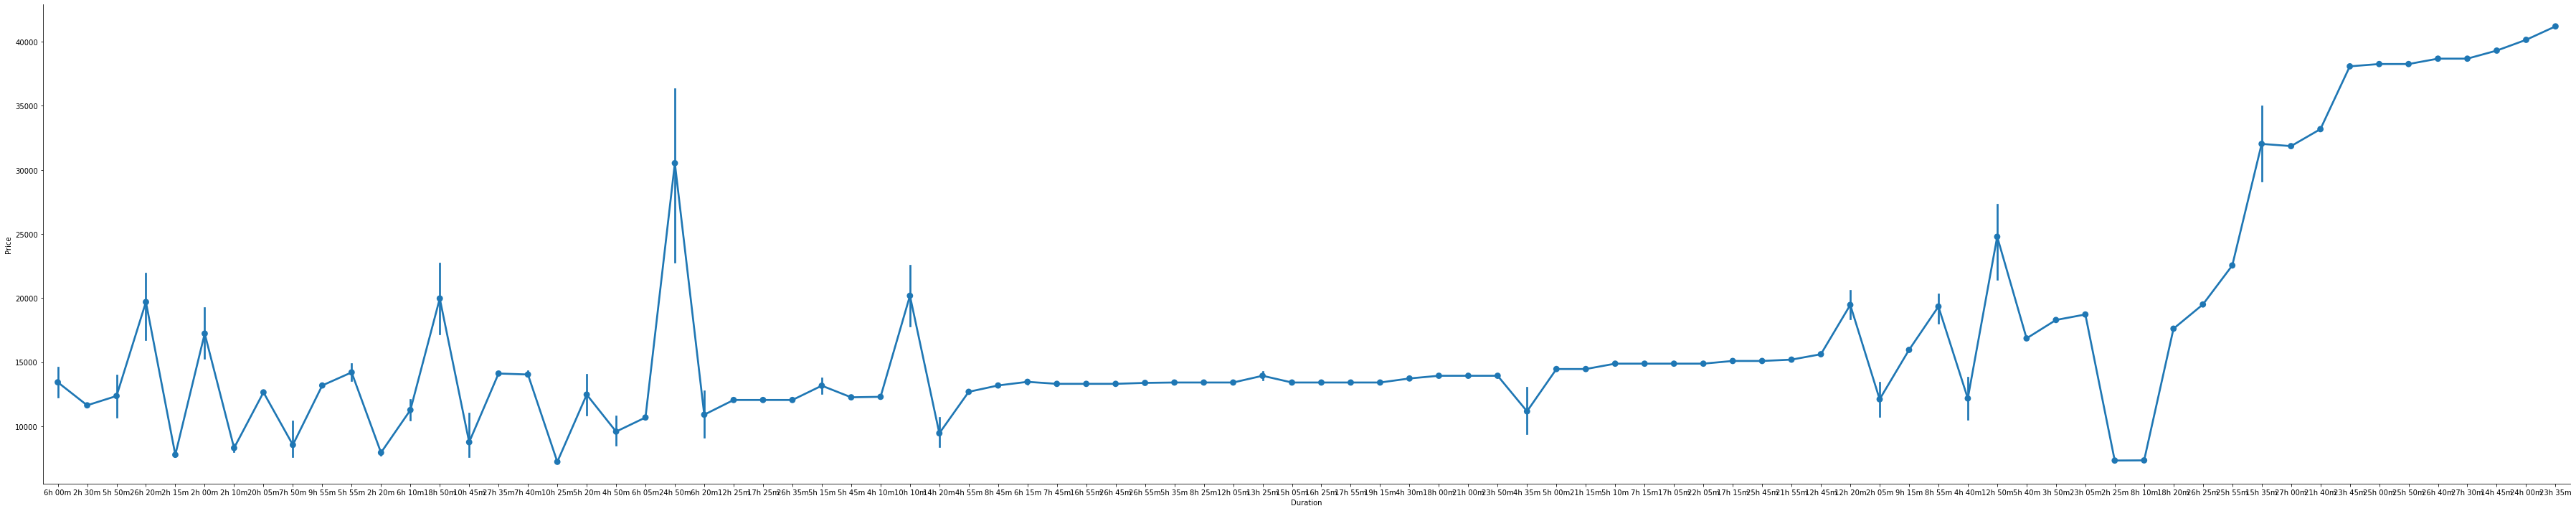

In [21]:
sns.catplot(y='Price',x='Duration',data=Data,kind='point',height=10,aspect=5) # Checking the relationship between price and dates

In [22]:
enc= LabelEncoder() #Encoding the object data type

In [23]:
columns=['Name','Depart_Time','Arrival_Time','Duration','Date']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [24]:
Data

,Name,Depart_Time,Arrival_Time,Duration,Price,Date
0,3,66,0,71,11519,4
1,2,96,10,54,11629,4
2,3,72,5,69,11939,4
3,1,90,2,39,12360,4
4,3,1,14,51,12569,4
...,...,...,...,...,...,...
2145,5,80,43,10,39314,3
2146,5,74,43,12,39314,3
2147,5,80,83,33,40154,3
2148,5,74,83,34,40154,3


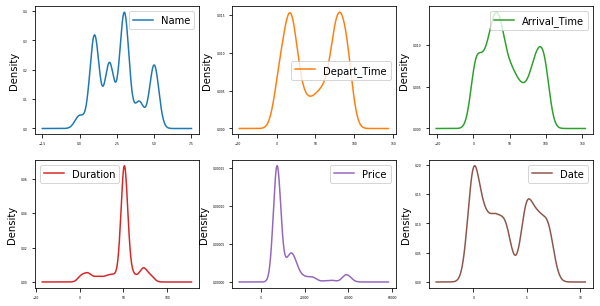

In [25]:
Data.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [26]:
# Here majority of the columns are object datatypes which has been converted into integer

In [27]:
Data.skew().sort_values(ascending=False) #checking the skewness

Price           2.406361
Arrival_Time    0.258484
Name            0.219187
Date            0.183351
Depart_Time    -0.037819
Duration       -0.989772
dtype: float64

In [28]:
X= Data.drop('Price',axis=1)
Y= Data['Price'] #dividing the feature and target variable

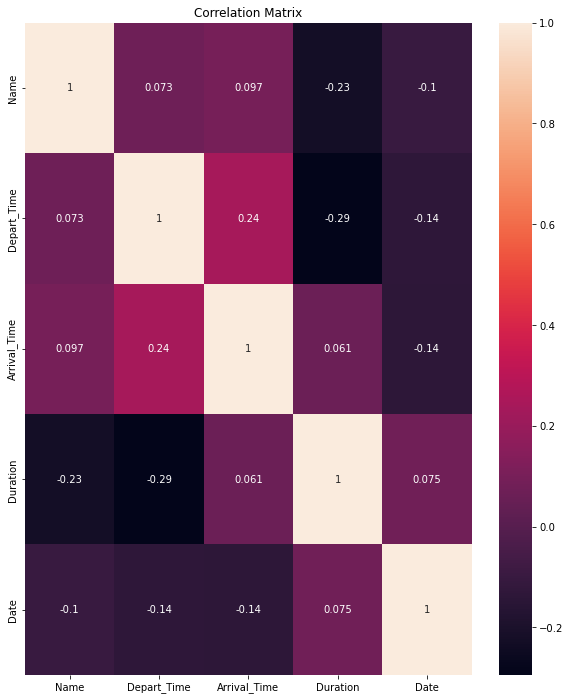

In [29]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [30]:
# Looking at the heatmap, it can be concluded that there is no correlation between any variable, however we can further confirm by VIF

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Name,3.408248
1,Depart_Time,3.075069
2,Arrival_Time,3.631171
3,Duration,4.626178
4,Date,2.318558


In [32]:
# Therefore there is no correlation

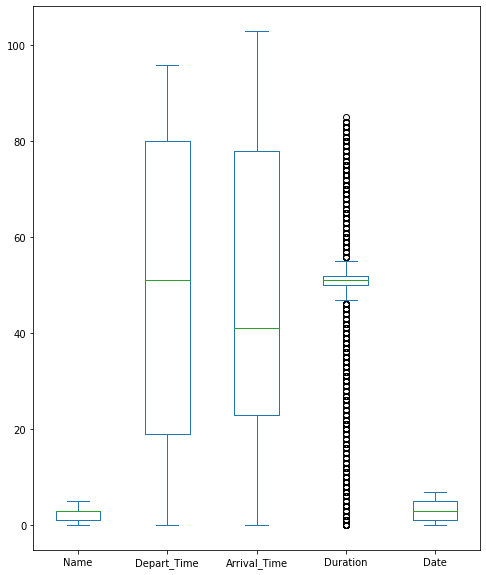

In [33]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [39]:
# As per boxplot, there is a huge outlier present in duration.

In [35]:
from scipy.stats import zscore

In [36]:
(np.abs(zscore(X)<3)).all()

Name            True
Depart_Time     True
Arrival_Time    True
Duration        True
Date            True
dtype: bool

In [37]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([], dtype=int64), array([], dtype=int64))

In [40]:
# However as per zscore there is no presence of an Outlier

In [41]:
Scalar=StandardScaler()

In [43]:
X_Scaled=Scalar.fit_transform(X)
X_Scaled

array([[ 0.25120657,  0.53881318, -1.5204656 ,  1.34403854,  0.36932694],
       [-0.44211067,  1.48397091, -1.20124592,  0.33463569,  0.36932694],
       [ 0.25120657,  0.72784472, -1.36085576,  1.22528526,  0.36932694],
       ...,
       [ 1.63784104,  0.97988679,  1.12905773, -0.91227372, -0.02769952],
       [ 1.63784104,  0.79085524,  1.12905773, -0.85289708, -0.02769952],
       [ 1.63784104,  0.97988679,  1.09713576, -1.09040363, -0.02769952]])

# Linear Regression

In [46]:
LR=LinearRegression()

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 32.16652894701281


# Decision Tree Regressor

In [48]:
DT=DecisionTreeRegressor()

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 92.27314192325183


# Random Forest Regressor

In [50]:
rf=RandomForestRegressor()

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
rf.fit(X_train,y_train)
pred_test=rf.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 95.29761494019634


# Gradient Boosting

In [54]:
GB=GradientBoostingRegressor()

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 96.63428350080792


# Cross Validation for LR

In [56]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y,cv=i)
    print("The cross validation score for Decision Tree Regressor",i,"is",LR_Val.mean())

The cross validation score for Decision Tree Regressor 2 is -13.895904973697052
The cross validation score for Decision Tree Regressor 3 is -429.2805405386153
The cross validation score for Decision Tree Regressor 4 is -149.82348961847052
The cross validation score for Decision Tree Regressor 5 is -1838.7376434717848


# Cross Validation for Decision Tree

In [58]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y,cv=i)
    print("The cross validation score for Decision Tree Regressor",i,"is",DT_Val.mean())

The cross validation score for Decision Tree Regressor 2 is -17.07087680757532
The cross validation score for Decision Tree Regressor 3 is -231.058633662574
The cross validation score for Decision Tree Regressor 4 is -4.946452252377017
The cross validation score for Decision Tree Regressor 5 is -0.2622595866603398


# Cross Validation for RF

In [59]:
for i in range(2,6):
    RF_Val=cross_val_score(rf,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is -1378.5603985364528
The cross validation score for 3 is -17223.58335130871
The cross validation score for 4 is -717.918598093258
The cross validation score for 5 is -23.496805066974574


# Cross Validation for GB

In [62]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is -940.551389178251
The cross validation score for 3 is -17513.240656296963
The cross validation score for 4 is -1113.3223224349263
The cross validation score for 5 is -1515.1426865838516


In [63]:
# From the cross validation scores, all the models are overfitted

# Hyperparameter Tuning

In [64]:
##Looking at the model building score, the Gradient Boosting gave the highest score, hence hyperparameter tuning is being performed on it

In [65]:
Grad_Boost=GradientBoostingRegressor()

In [66]:
parameters={'max_depth':(list(range(10,15))),'min_samples_split':(list(range(4,5))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(Grad_Boost,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13, 14],
                         'min_samples_leaf': [2], 'min_samples_split': [4]})

In [67]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [68]:
Grad_Boost=GradientBoostingRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
Grad_Boost.fit(X_train,y_train)
pred_test=Grad_Boost.predict(X_test)

In [71]:
Grad_Boost_Score=r2_score(y_test,pred_test)*100
Grad_Boost_Score

92.78659458307514

In [72]:
#It seems that the accuracy reduced, lets try with few more parameters

In [100]:
GBR=GradientBoostingRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2,criterion='mae')

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
GBR.fit(X_train,y_train)
pred_test=GBR.predict(X_test)

In [102]:
GBR_Score=r2_score(y_test,pred_test)*100
GBR_Score

92.41460392275738

## It seems that te score prior to hyperparameter tuning is better than after performing hyperparameter tuning

## Therefore we will keep the original score for Gradient Boosting

# Saving the model

In [105]:
import pickle
filename='Flight Price Prediction Details.pkl'
pickle.dump(GB,open(filename,'wb'))